In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Define dataset class
class MundariHandwritingDataset(Dataset):
    def __init__(self, image_folder="C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset", transform=None):
        self.image_folder = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset"
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_files[idx])
        image = Image.open(img_path).convert("L")  # Convert to grayscale
        
        if self.transform:
            image = self.transform(image)
        
        label = self.image_files[idx].split('.')[0]  # Extract label from filename
        return image, label


In [2]:
import torchvision
print(torchvision.__version__)


0.21.0+cpu


In [3]:

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [4]:
import os
image_folder = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset"
print(os.listdir(image_folder))


['cnn_model.h5', 'labels.csv', 'labels_cleaned.csv', 'labels_updated.csv', 'test', 'test_labels.csv', 'train', 'train_labels.csv', 'val_labels.csv']


In [5]:
import os
train_folder = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train"
print(os.listdir(train_folder))


['grayscale', 'img _3.jpeg', 'labels.csv', 'nawa', 'nawa_writer1_001.jpeg', 'nawa_writer1_002.jpeg', 'nawa_writer1_0023.jpeg', 'nawa_writer1_0024.jpeg', 'nawa_writer1_003.jpeg', 'nawa_writer1_004.jpeg', 'nawa_writer1_005.jpeg', 'nawa_writer1_006.jpeg', 'nawa_writer1_007.jpeg', 'nawa_writer1_008.jpeg', 'nawa_writer1_009.jpeg', 'nawa_writer1_010.jpeg', 'nawa_writer1_011.jpeg', 'nawa_writer1_012.jpeg', 'nawa_writer1_013.jpeg', 'nawa_writer1_014.jpeg', 'nawa_writer1_015.jpeg', 'nawa_writer1_016.jpeg', 'nawa_writer1_017.jpeg', 'nawa_writer1_018.jpeg', 'nawa_writer1_019.jpeg', 'nawa_writer1_020.jpeg', 'nawa_writer1_021.jpeg', 'nawa_writer1_022.jpeg', 'nawa_writer1_025.jpeg', 'nawa_writer1_026.jpeg', 'nawa_writer1_027.jpeg', 'nawa_writer1_028.jpeg', 'nawa_writer1_029.jpeg', 'nawa_writer1_030.jpeg', 'nawa_writer1_031.jpeg', 'nawa_writer1_032.jpeg', 'nawa_writer1_033.jpeg', 'nawa_writer1_034.jpeg', 'nawa_writer1_035.jpeg', 'nawa_writer1_036.jpeg', 'nawa_writer1_037.jpeg', 'nawa_writer1_038.jpeg

In [6]:
image_folder = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train"
dataset = MundariHandwritingDataset(image_folder, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [7]:
import os

image_folder = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train"

# Check if the folder exists
if not os.path.exists(image_folder):
    print("Error: Path does not exist!")
else:
    print("Path exists, listing files:")
    print(os.listdir(image_folder))  # Print the files inside the folder


Path exists, listing files:
['grayscale', 'img _3.jpeg', 'labels.csv', 'nawa', 'nawa_writer1_001.jpeg', 'nawa_writer1_002.jpeg', 'nawa_writer1_0023.jpeg', 'nawa_writer1_0024.jpeg', 'nawa_writer1_003.jpeg', 'nawa_writer1_004.jpeg', 'nawa_writer1_005.jpeg', 'nawa_writer1_006.jpeg', 'nawa_writer1_007.jpeg', 'nawa_writer1_008.jpeg', 'nawa_writer1_009.jpeg', 'nawa_writer1_010.jpeg', 'nawa_writer1_011.jpeg', 'nawa_writer1_012.jpeg', 'nawa_writer1_013.jpeg', 'nawa_writer1_014.jpeg', 'nawa_writer1_015.jpeg', 'nawa_writer1_016.jpeg', 'nawa_writer1_017.jpeg', 'nawa_writer1_018.jpeg', 'nawa_writer1_019.jpeg', 'nawa_writer1_020.jpeg', 'nawa_writer1_021.jpeg', 'nawa_writer1_022.jpeg', 'nawa_writer1_025.jpeg', 'nawa_writer1_026.jpeg', 'nawa_writer1_027.jpeg', 'nawa_writer1_028.jpeg', 'nawa_writer1_029.jpeg', 'nawa_writer1_030.jpeg', 'nawa_writer1_031.jpeg', 'nawa_writer1_032.jpeg', 'nawa_writer1_033.jpeg', 'nawa_writer1_034.jpeg', 'nawa_writer1_035.jpeg', 'nawa_writer1_036.jpeg', 'nawa_writer1_037.j

In [8]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class MundariHandwritingDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.transform = transform
        self.image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Check if the folder contains images
        if len(self.image_files) == 0:
            raise ValueError("No image files found in the directory!")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_files[idx])
        
        # Check if file exists
        if not os.path.exists(img_path):
            print(f"Warning: File {img_path} not found!")

        image = Image.open(img_path).convert("L")  # Convert to grayscale
        
        if self.transform:
            image = self.transform(image)
        
        label = self.image_files[idx].split('.')[0]  # Extract label from filename
        return image, label


In [9]:
from torchvision import transforms

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
dataset = MundariHandwritingDataset(image_folder, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Test loading images
for images, labels in dataloader:
    print(f"Batch size: {images.shape}, Labels: {labels}")
    break  # Print one batch and stop


Batch size: torch.Size([16, 1, 64, 64]), Labels: ('nawa_writer4_101', 'nawa_writer4_133', 'unknown_writer0_069', 'nawa_writer1_003', 'img _3', 'nawa_writer1_060', 'unknown_writer0_112', 'nawa_writer2_064', 'nawa_writer1_012', 'unknown_writer0_012', 'nawa_writer4_146', 'nawa_writer2_057', 'unknown_writer0_083', 'unknown_writer0_028', 'nawa_writer3_050', 'nawa_writer3_044')


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Adjust based on image size
        self.fc2 = nn.Linear(128, 10)  # Change 10 to the number of unique labels
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)  # Flatten layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [11]:
import torch.nn as nn
import torch.nn.functional as F

# Simple CNN for character classification
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Assuming input image is 64x64
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 -> 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 -> 16x16
        x = x.view(-1, 64 * 16 * 16)          # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [12]:
num_classes = 10  # change this to match your dataset
model = CNNModel(num_classes=num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
class MundariHandwritingDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
        self.transform = transform

        # Extract labels from filenames and build label-to-index mapping
        self.labels = [f.split('_')[0] for f in self.image_files]  # e.g., 'nawa'
        self.classes = sorted(set(self.labels))                    # Unique labels
        self.label_to_index = {label: idx for idx, label in enumerate(self.classes)}

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert("L")

        if self.transform:
            image = self.transform(image)

        label_str = img_name.split('_')[0]
        label_idx = self.label_to_index[label_str]
        return image, label_idx


In [14]:
# Assuming model is already defined and moved to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [15]:
num_epochs = 10  # Change as needed

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for images, labels in dataloader:
        images = images.to(device)
        
        # Convert labels to numerical format
        labels = [hash(label) % 10 for label in labels]  # Temporary label encoding
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

print("Training complete!")


Epoch [1/10], Loss: 53.1257
Epoch [2/10], Loss: 52.7663
Epoch [3/10], Loss: 52.5644
Epoch [4/10], Loss: 51.7744
Epoch [5/10], Loss: 49.9861
Epoch [6/10], Loss: 47.5074
Epoch [7/10], Loss: 43.8246
Epoch [8/10], Loss: 38.6487
Epoch [9/10], Loss: 34.0751
Epoch [10/10], Loss: 29.3438
Training complete!


In [16]:
import matplotlib.pyplot as plt

# Function to test model with one batch
def test_model(dataloader, model):
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():  # No gradients needed for testing
        images, labels = next(iter(dataloader))
        images = images.to(device)
        

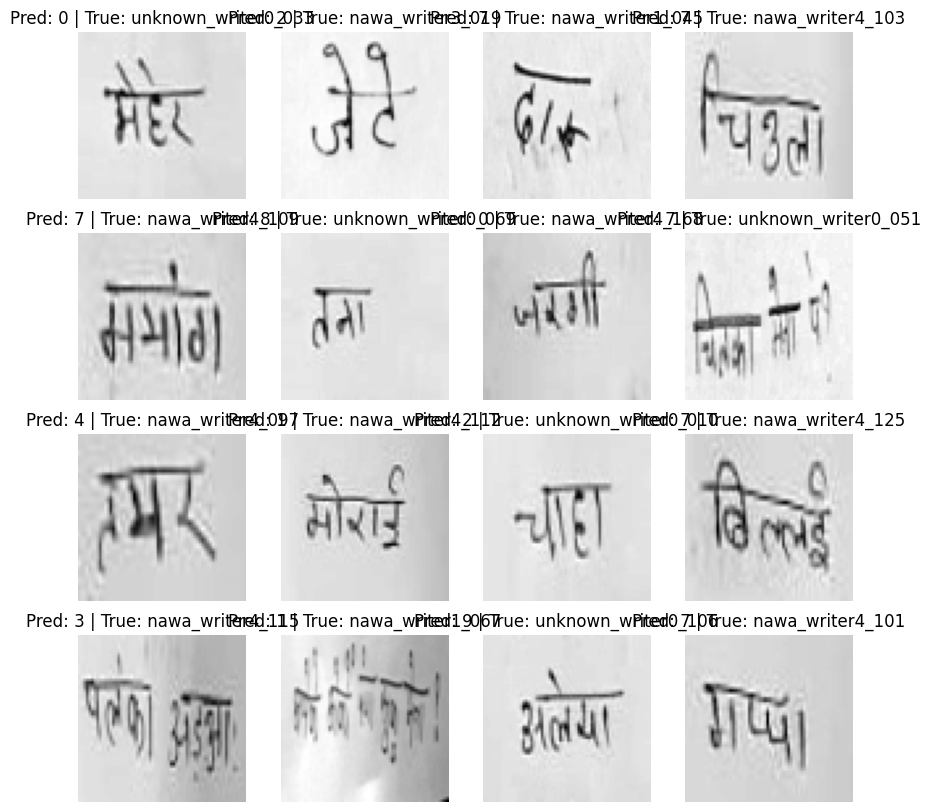

In [17]:
import matplotlib.pyplot as plt

# Function to test model with one batch
def test_model(dataloader, model, device):
    model.eval()  # Set model to evaluation mode
    
    with torch.no_grad():  # No gradients needed for testing
        images, labels = next(iter(dataloader))
        images = images.to(device)
        
        # Convert labels to numerical format
        true_labels = labels  # Keep original label names
        labels = [hash(label) % 10 for label in labels]  # Temporary numerical labels
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class

        # Visualizing images
        fig, axes = plt.subplots(4, 4, figsize=(10, 10))
        axes = axes.flatten()
        
        for i in range(16):  # Show 16 images
            img = images[i].cpu().squeeze(0).numpy()
            axes[i].imshow(img, cmap="gray")
            axes[i].set_title(f"Pred: {predicted[i].item()} | True: {true_labels[i]}")
            axes[i].axis("off")
        
        plt.show()

# Run the test function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
test_model(dataloader, model, device)


In [19]:
pip show sentencepiece


Name: sentencepiece
Version: 0.2.0
Summary: SentencePiece python wrapper
Home-page: https://github.com/google/sentencepiece
Author: Taku Kudo
Author-email: taku@google.com
License: Apache
Location: c:\users\prema\appdata\local\programs\python\python310\lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [20]:
from transformers import MarianMTModel, MarianTokenizer

# Function to translate text using MarianMT model
def translate_text(text, src_lang="en", tgt_lang="hi"):
    model_name = f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}'
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    
    # Tokenize the input text and translate
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated = model.generate(**inputs)
    
    # Decode the translated tokens to text
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
    return translated_text

# Example usage
recognized_text = "Hello, how are you?"
translated_text = translate_text(recognized_text, src_lang="en", tgt_lang="hi")
print(f"Translated text: {translated_text}")


Translated text: हैलो, तुम कैसे हो?


In [21]:
import pandas as pd

# Load your CSV file
df = pd.read_csv(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv")
  # replace with actual path

def translate_mundari_word(word_devanagari):
    match = df[df['Devanagari'] == word_devanagari]
    if not match.empty:
        return {
            "Latin": match['Latin'].values[0],
            "Ol Chiki": match['Ol Chiki'].values[0],
            "English": match['English'].values[0]
        }
    else:
        return {"Error": "Word not found in dictionary."}


In [22]:
print(df.head())  # Show first few rows
print(df.columns)  # See column names


               Ol Chiki              Devanagari      English Meaning  \
0                  ᱞᱚᱞᱚ                    लोलो                  Hot   
1            ᱪᱤᱞᱠᱟ ᱛᱟᱢ?              चिल्का तम?         How are you?   
2      ᱟᱭᱝ ᱰᱚ ᱵᱮᱥ ᱜᱤ ᱭᱟ         आइंग दो बेस गि।            I am fine   
3  ᱟᱭᱝ ᱦᱚ ᱵᱮᱥ ᱜᱤ ᱢᱮᱱᱤᱭᱟ  आइंग हो बेस गि मेनिया।      I am also fine.   
4  ᱟᱢᱟ ᱳᱰᱰᱟ ᱠᱚᱛᱟ ᱨᱮ ᱭᱟ?      अमा ओड्डा कोटा रे?  Where is your home?   

                    Latin  
0                    Lolo  
1             Chilka tam?  
2         Aaing do bes gi  
3  Aaing ho bes gi meniya  
4       Ama odda kota re?  
Index(['Ol Chiki', 'Devanagari', 'English Meaning', 'Latin'], dtype='object')


In [23]:
import pandas as pd

# Load the CSV file (use raw string or double backslashes to avoid path error)
df = pd.read_csv(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv", encoding='utf-8')

# Search function
def translate_from_devanagari(input_word):
    result = df[df["Devanagari"].str.strip() == input_word.strip()]
    if not result.empty:
        return {
            "Ol Chiki": result["Ol Chiki"].values[0],
            "Latin": result["Latin"].values[0],
            "English Meaning": result["English Meaning"].values[0]
        }
    else:
        return {"Error": "Word not found in dictionary."}

# Example usage
search_word = "चिल्का तम?"
output = translate_from_devanagari(search_word)
print(output)


{'Ol Chiki': 'ᱪᱤᱞᱠᱟ ᱛᱟᱢ?', 'Latin': 'Chilka tam?', 'English Meaning': 'How are you?'}


In [29]:
import os

folder_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project"
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):
            print(os.path.join(root, file))


C:\Users\prema\OneDrive\Documents\Mundari Project\labels.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\labels.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\labels_cleaned.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\labels_updated.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\test_labels.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train_labels.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\val_labels.csv
C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\labels.csv


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch
img_height, img_width = 64, 64
batch_size = 32

train_dir = "C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train"

# ImageDataGenerator for training
train_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 152 images belonging to 3 classes.


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,539 (6.20 MB)

 Trainable params: 1,625,539 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # You can increase this if needed
    verbose=1
)


Epoch 1/10


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5852 - loss: 0.5819
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9764 - loss: 0.2689
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9855 - loss: 0.2001 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9832 - loss: 0.1213
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9809 - loss: 0.1685
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9874 - loss: 0.0963
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9803 - loss: 0.1303
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9780 - loss: 0.1282
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9705 - loss: 0.1525
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9691 - loss: 0.1732


In [34]:
model.save("model.h5")
print(" Model saved as model.h5")


 Model saved as model.h5


In [35]:
import pickle
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset directory
dataset_path = "C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset"

# Prepare data to extract labels
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Extract and save class labels
class_labels = list(train_data.class_indices.keys())

with open("class_labels.pkl", "wb") as f:
    pickle.dump(class_labels, f)

print(" class_labels.pkl saved successfully!")


Found 528 images belonging to 2 classes.
 class_labels.pkl saved successfully!


In [36]:
model.save("mundari_handwriting_model.h5")


In [37]:
from keras.models import load_model
import pickle

# Load the trained model
model = load_model("mundari_handwriting_model.h5")

# Load the class labels
with open("class_labels.pkl", "rb") as f:
    class_labels = pickle.load(f)


In [48]:
# Cell 1: Imports and Model Load
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load trained model
model = load_model("mundari_handwriting_model.h5")

# Load class labels
with open("class_labels.pkl", "rb") as f:
    class_labels = pickle.load(f)

# Load dictionary CSV
dictionary_df = pd.read_csv(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv")



In [51]:
# Cell 2: Prediction Function
def predict_image(img_path):
    try:
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(64, 64))  # default is RGB
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)
        predicted_label = class_labels[predicted_index]

        # Lookup in dictionary
        row = dictionary_df[dictionary_df["Devanagari"] == predicted_label]

        print(f"\n📝 Predicted Devanagari: {predicted_label}")
        if not row.empty:
            print(f" Latin: {row['Latin'].values[0]}")
            print(f" Ol Chiki: {row['Ol Chiki'].values[0]}")
            print(f"🇬🇧 English: {row['English Meaning'].values[0]}")
        else:
            print(" Word not found in dictionary.")

        # Show image with predicted label
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Predicted: {predicted_label}")
        plt.show()

    except Exception as e:
        print(f" Error: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

📝 Predicted Devanagari: train
 Word not found in dictionary.


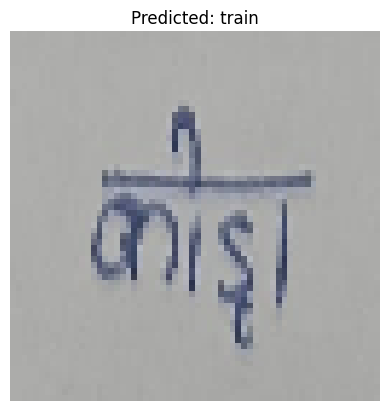

In [52]:
predict_image(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\nawa_writer1_015.jpeg")


In [53]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(64, 64)):
    # Read image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize image to match model input size
    img = cv2.resize(img, target_size)
    
    # Normalize image (scale pixel values to range 0-1)
    img = img.astype('float32') / 255.0
    
    # Expand dimensions to match model input shape (batch size, width, height, channels)
    img = np.expand_dims(img, axis=-1)  # Adding channel dimension for grayscale
    img = np.expand_dims(img, axis=0)   # Adding batch dimension
    
    return img


In [54]:
def predict_image(model, image_path):
    # Preprocess image
    img = preprocess_image(image_path)
    
    # Predict with the model
    prediction = model.predict(img)
    
    # Print prediction probabilities or logits for debugging
    print("Prediction probabilities:", prediction)
    
    # Get the index with the highest probability
    predicted_class = np.argmax(prediction)
    
    return predicted_class


In [62]:
import pandas as pd

# Define the function to load the dictionary (path passed as argument)
def load_dictionary(csv_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_path)
    return df

# Define the function to lookup the word
def lookup_word(word, dictionary):
    # Strip spaces from the word and the dictionary column
    word = word.strip().lower()  # Remove extra spaces and convert to lowercase
    dictionary['Ol Chiki'] = dictionary['Ol Chiki'].str.strip().str.lower()  # Strip spaces and lowercase

    # Check if the word is in the dictionary
    found_word = dictionary[dictionary['Ol Chiki'] == word]  # Adjust column name if needed
    
    if found_word.empty:
        return None  # Word not found
    else:
        # Return the corresponding translations (Ol Chiki, Devanagari, Latin, English)
        return found_word.iloc[0]  # Return the first match (in case of duplicates)

# Path to your dictionary CSV file
dictionary_path = r"C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dictionary (1).csv"

# Load the dictionary by passing the file path
dictionary = load_dictionary(dictionary_path)

# Print the first few rows of the dictionary to verify
print("Loaded Dictionary:")
print(dictionary.head())  # Check the first 5 rows of the DataFrame

# Example word to lookup
word_to_lookup = "boro"  # Replace this with any word you want to lookup

# Lookup the word in the dictionary
result = lookup_word(word_to_lookup, dictionary)

if result is None:
    print(f"Word '{word_to_lookup}' not found in the dictionary.")
else:
    print(f"Word '{word_to_lookup}' found in dictionary: {result}")


Loaded Dictionary:
               Ol Chiki              Devanagari      English Meaning  \
0                  ᱞᱚᱞᱚ                    लोलो                  Hot   
1            ᱪᱤᱞᱠᱟ ᱛᱟᱢ?              चिल्का तम?         How are you?   
2      ᱟᱭᱝ ᱰᱚ ᱵᱮᱥ ᱜᱤ ᱭᱟ         आइंग दो बेस गि।            I am fine   
3  ᱟᱭᱝ ᱦᱚ ᱵᱮᱥ ᱜᱤ ᱢᱮᱱᱤᱭᱟ  आइंग हो बेस गि मेनिया।      I am also fine.   
4  ᱟᱢᱟ ᱳᱰᱰᱟ ᱠᱚᱛᱟ ᱨᱮ ᱭᱟ?      अमा ओड्डा कोटा रे?  Where is your home?   

                    Latin  
0                    Lolo  
1             Chilka tam?  
2         Aaing do bes gi  
3  Aaing ho bes gi meniya  
4       Ama odda kota re?  
Word 'boro' not found in the dictionary.


In [63]:
# Print all the Ol Chiki words in the dictionary to check for any discrepancies
print(dictionary['Ol Chiki'])


0                      ᱞᱚᱞᱚ
1                ᱪᱤᱞᱠᱟ ᱛᱟᱢ?
2          ᱟᱭᱝ ᱰᱚ ᱵᱮᱥ ᱜᱤ ᱭᱟ
3      ᱟᱭᱝ ᱦᱚ ᱵᱮᱥ ᱜᱤ ᱢᱮᱱᱤᱭᱟ
4      ᱟᱢᱟ ᱳᱰᱰᱟ ᱠᱚᱛᱟ ᱨᱮ ᱭᱟ?
               ...         
405                ᱦᱚᱱ ᱠᱩᱰᱤ
406                   ᱦᱟᱱᱟᱨ
407               ᱤᱨᱤᱞ ᱠᱩᱰᱤ
408               ᱤᱨᱤᱞ ᱠᱚᱰᱟ
409                   ᱵᱷᱟᱛᱩ
Name: Ol Chiki, Length: 410, dtype: object


In [65]:
print(dictionary['Ol Chiki'].head(20))  # Print the first 20 rows


0                     ᱞᱚᱞᱚ
1               ᱪᱤᱞᱠᱟ ᱛᱟᱢ?
2         ᱟᱭᱝ ᱰᱚ ᱵᱮᱥ ᱜᱤ ᱭᱟ
3     ᱟᱭᱝ ᱦᱚ ᱵᱮᱥ ᱜᱤ ᱢᱮᱱᱤᱭᱟ
4     ᱟᱢᱟ ᱳᱰᱰᱟ ᱠᱚᱛᱟ ᱨᱮ ᱭᱟ?
5      ᱟᱢ ᱢᱟᱱᱫᱤ ᱡᱚᱢ ᱠᱮᱫᱟᱢ?
6     ᱟᱭᱝ ᱢᱟᱱᱫᱤ ᱡᱚᱢ ᱠᱮᱫᱟᱭᱝ
7                     ᱵᱚᱲᱚ
8                ᱡᱚᱢ-ᱠᱷᱟᱱᱟ
9              ᱦᱮᱰᱮᱢ ᱰᱩᱰᱩᱢ
10                       ᱑
11                       ᱒
12                       𑁩
13                       ᱔
14                       ᱕
15                       ᱖
16                       ᱕
17                       ᱘
18                       ᱙
19                      ᱑᱐
Name: Ol Chiki, dtype: object


In [66]:
print(dictionary[['Ol Chiki', 'Devanagari', 'English Meaning', 'Latin']].head(20))  # Inspect the first 20 rows


                Ol Chiki                    Devanagari  \
0                   ᱞᱚᱞᱚ                          लोलो   
1             ᱪᱤᱞᱠᱟ ᱛᱟᱢ?                    चिल्का तम?   
2       ᱟᱭᱝ ᱰᱚ ᱵᱮᱥ ᱜᱤ ᱭᱟ               आइंग दो बेस गि।   
3   ᱟᱭᱝ ᱦᱚ ᱵᱮᱥ ᱜᱤ ᱢᱮᱱᱤᱭᱟ        आइंग हो बेस गि मेनिया।   
4   ᱟᱢᱟ ᱳᱰᱰᱟ ᱠᱚᱛᱟ ᱨᱮ ᱭᱟ?            अमा ओड्डा कोटा रे?   
5    ᱟᱢ ᱢᱟᱱᱫᱤ ᱡᱚᱢ ᱠᱮᱫᱟᱢ?             आम मंदी जोम केडम?   
6   ᱟᱭᱝ ᱢᱟᱱᱫᱤ ᱡᱚᱢ ᱠᱮᱫᱟᱭᱝ  हें, आइंग मंदी जोम केडाइंग।"   
7                   ᱵᱚᱲᱚ                          बोरो   
8              ᱡᱚᱢ-ᱠᱷᱟᱱᱟ                           जोम   
9            ᱦᱮᱰᱮᱢ ᱰᱩᱰᱩᱢ                   हेडेम दुदुम   
10                     ᱑                         मियाद   
11                     ᱒                         बरिया   
12                     𑁩                         अपिया   
13                     ᱔                         उपुना   
14                     ᱕                        मोडेया   
15                     ᱖                        तुरिया   
16            

In [71]:
pip install pytesseract pillow


In [77]:
pip install easyocr


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Preprocess the image for the model (convert to grayscale)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')  # Convert to grayscale
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [2]:
# Preprocess the image for the model (keep RGB)
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64), color_mode='rgb')  # Keep RGB
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [3]:
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# 2. Set paths
train_dir = r'C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train'  # your train folder path
test_dir = r'C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\test'    # your test folder path

# 3. Parameters
img_height, img_width = 40, 40   # as per your project
batch_size = 32
epochs = 20

# 4. Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

# 5. Build Model
num_classes = train_generator.num_classes  # automatically detects

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# 6. Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# 8. Save Model
model_save_path = r'C:\Users\prema\OneDrive\Documents\Mundari Project\model.h5'
model.save(model_save_path)

print(" Model trained and saved successfully at:", model_save_path)


Found 152 images belonging to 3 classes.
Found 11 images belonging to 3 classes.
Epoch 1/20


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.5438 - loss: 0.6872 - val_accuracy: 0.2727 - val_loss: 5.6211
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9756 - loss: 0.2065 - val_accuracy: 0.2727 - val_loss: 7.0787
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9901 - loss: 0.0944 - val_accuracy: 0.2727 - val_loss: 5.9028
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9795 - loss: 0.1525 - val_accuracy: 0.2727 - val_loss: 3.2891
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9653 - loss: 0.2023 - val_accuracy: 0.2727 - val_loss: 2.8159
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9739 - loss: 0.1374 - val_accuracy: 0.2727 - val_loss: 3.8816
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9813 - loss: 0.1124 - val_accuracy: 0.2727 - val_loss: 4.3008
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9895 - loss: 0.0688 - val_accuracy: 0.2727 - val_loss: 3.7893
Epoch 9/20


 Model trained and saved successfully at: C:\Users\prema\OneDrive\Documents\Mundari Project\model.h5


In [6]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('C:/Users/prema/OneDrive/Documents/Mundari Project/model.h5')


In [7]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Step 1: Load the saved model
model = load_model('C:/Users/prema/OneDrive/Documents/Mundari Project/model.h5')

# Step 2: Load and preprocess the image
# Replace with your image path
img_path = r'C:/Images/nawa_writer1_008.jpeg'  # Example path, adjust accordingly

# Load the image using OpenCV
img = cv2.imread(img_path)

# Check if image is loaded correctly
if img is None:
    print(f"Error: Image not loaded correctly from {img_path}. Check the path or file format.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize the image to match the model's expected input size (e.g., 28x28 for MNIST-like models)
    img_resized = cv2.resize(img_gray, (28, 28))

    # Normalize the image (if your model was trained with normalized images)
    img_normalized = img_resized / 255.0
    
    # Reshape image to (1, 28, 28, 1) if needed (for single-channel images)
    img_reshaped = np.reshape(img_normalized, (1, 28, 28, 1))  # Update this depending on your input shape

    # Step 3: Make prediction using the model
    prediction = model.predict(img_reshaped)

    # Step 4: Interpret the prediction
    # Assuming the output of the model is a class index, if it's a classification problem
    predicted_class = np.argmax(prediction, axis=1)
    
    print(f"Predicted class: {predicted_class}")
    
    # Optionally: map predicted class to label or text based on your dictionary
    # For example, if you have a mapping dictionary:
    # class_labels = ['class_1', 'class_2', ...]
    # print(f"Prediction: {class_labels[predicted_class[0]]}")


Error: Image not loaded correctly from C:/Images/nawa_writer1_008.jpeg. Check the path or file format.


In [11]:
img_path = r'C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train/img_3.jpeg'


In [13]:
import os

folder_path = r'C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train'

# List all files in the train folder
files = os.listdir(folder_path)

print("Files inside train folder:")
for f in files:
    print(f)


Files inside train folder:
grayscale
img _3.jpeg
labels.csv
nawa
nawa_writer1_001.jpeg
nawa_writer1_002.jpeg
nawa_writer1_0023.jpeg
nawa_writer1_0024.jpeg
nawa_writer1_003.jpeg
nawa_writer1_004.jpeg
nawa_writer1_005.jpeg
nawa_writer1_006.jpeg
nawa_writer1_007.jpeg
nawa_writer1_008.jpeg
nawa_writer1_009.jpeg
nawa_writer1_010.jpeg
nawa_writer1_011.jpeg
nawa_writer1_012.jpeg
nawa_writer1_013.jpeg
nawa_writer1_014.jpeg
nawa_writer1_015.jpeg
nawa_writer1_016.jpeg
nawa_writer1_017.jpeg
nawa_writer1_018.jpeg
nawa_writer1_019.jpeg
nawa_writer1_020.jpeg
nawa_writer1_021.jpeg
nawa_writer1_022.jpeg
nawa_writer1_025.jpeg
nawa_writer1_026.jpeg
nawa_writer1_027.jpeg
nawa_writer1_028.jpeg
nawa_writer1_029.jpeg
nawa_writer1_030.jpeg
nawa_writer1_031.jpeg
nawa_writer1_032.jpeg
nawa_writer1_033.jpeg
nawa_writer1_034.jpeg
nawa_writer1_035.jpeg
nawa_writer1_036.jpeg
nawa_writer1_037.jpeg
nawa_writer1_038.jpeg
nawa_writer1_039.jpeg
nawa_writer1_040.jpeg
nawa_writer1_041.jpeg
nawa_writer1_042.jpeg
nawa_writ

In [14]:
import pandas as pd

# Load your labels.csv file
csv_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\labels.csv"
df = pd.read_csv(csv_path)

# Filter filenames that start with "unknown_writer0"
unknown_images = df[df['filename'].str.startswith('unknown_writer0')]

# Print the unknown images and their labels
print(unknown_images)

# Optional: Check if any label is missing
missing_labels = unknown_images[unknown_images['label'].isnull()]
if not missing_labels.empty:
    print("\nSome unknown images are missing labels:")
    print(missing_labels)
else:
    print("\nAll unknown images have labels!")


                     filename  label
233  unknown_writer0_001.jpeg  train
234  unknown_writer0_004.jpeg  train
235  unknown_writer0_005.jpeg  train
236  unknown_writer0_006.jpeg  train
237  unknown_writer0_007.jpeg  train
..                        ...    ...
360  unknown_writer0_130.jpeg  train
361  unknown_writer0_131.jpeg  train
362  unknown_writer0_132.jpeg  train
363  unknown_writer0_133.jpeg  train
364  unknown_writer0_134.jpeg  train

[132 rows x 2 columns]

All unknown images have labels!


In [15]:
import os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Set your dataset path
dataset_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train"

# Read image files and labels
data = []

for filename in os.listdir(dataset_path):
    if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
        # Now we are NOT ignoring unknown_writer0
        label = filename.split("_")[0]
        img_path = os.path.join(dataset_path, filename)
        data.append((img_path, label))

# Check data
print(f"Total images including unknown_writer0: {len(data)}")

# Separate images and labels
image_paths, labels = zip(*data)

# Encode labels
label_to_index = {label: idx for idx, label in enumerate(sorted(set(labels)))}
index_to_label = {idx: label for label, idx in label_to_index.items()}

labels_encoded = np.array([label_to_index[label] for label in labels])

# Load images
X = []
for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Resize for uniformity
    img = img / 255.0  # Normalize
    X.append(img)

X = np.array(X)
X = X.reshape(-1, 64, 64, 1)
y = to_categorical(labels_encoded)

# Split into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

# Save the model
model.save("mundari_handwritten_model.h5")

print("Training complete ")


Total images including unknown_writer0: 365


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4830 - loss: 0.8368 - val_accuracy: 0.6027 - val_loss: 0.7133
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6188 - loss: 0.6626 - val_accuracy: 0.6027 - val_loss: 1.0045
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6417 - loss: 0.7196 - val_accuracy: 0.6027 - val_loss: 0.6796
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6465 - loss: 0.5827 - val_accuracy: 0.6164 - val_loss: 0.6722
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6893 - loss: 0.5162 - val_accuracy: 0.6027 - val_loss: 0.6547
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7497 - loss: 0.4726 - val_accuracy: 0.6301 - val_loss: 0.6261
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7891 - loss: 0.4484 - val_accuracy: 0.6712 - val_loss: 0.6331
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7830 - loss: 0.4115 - val_accuracy: 0.6849 - v

Training complete 


In [18]:
import numpy as np
import cv2
from tensorflow import keras

# Load your trained model
model = keras.models.load_model("mundari_handwritten_model.h5")  # or .keras if you saved in .keras

# Dictionary to map labels to word names
label_to_word = {
    0: 'boro',  # example, replace it with your actual label names
    1: 'daka',
    2: 'horo',
    # Add all your labels here
    20: 'unknown_writer'  # Include the unknown writer class if you trained it
}

# Function to preprocess and predict
def predict_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print("Error: Image could not be loaded. Please check the file path.")
        return

    img = cv2.resize(img, (64, 64))  # resize to match model input
    img = img / 255.0  # normalize pixel values
    img = np.expand_dims(img, axis=-1)  # add channel dimension
    img = np.expand_dims(img, axis=0)   # add batch dimension

    # Predict
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = np.max(prediction)

    # Get the label name
    label_name = label_to_word.get(predicted_class, "Unknown")

    print(f"Predicted Class: {label_name} (Confidence: {confidence:.2f})")

# Example usage
predict_image(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\img _3.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Class: horo (Confidence: 0.82)


In [20]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
def predict_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading image: {image_path}")
        return
    
    # Preprocess the image
    img = cv2.resize(img, (64, 64))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict the class of the image
    predictions = model.predict(img)
    print("Predictions:", predictions)  # Print the predictions

    if predictions is None or len(predictions) == 0:
        print("No predictions received")
        return

    predicted_class = np.argmax(predictions)  # Get the index of the highest probability
    confidence = predictions[0][predicted_class]  # Confidence of the prediction

    # Map the class index to the corresponding label
    label_map = {0: 'boro', 1: 'horo'}  # Update this mapping according to your classes
    label_name = label_map.get(predicted_class, "Unknown")

    print(f"Predicted Class: {label_name} (Confidence: {confidence:.2f})")

# Example usage
predict_image(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\img _3.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predictions: [[7.1746187e-04 1.8235005e-01 8.1693256e-01]]
Predicted Class: Unknown (Confidence: 0.82)


In [25]:
def predict_image(image_path):
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error loading image: {image_path}")
        return
    
    # Preprocess the image
    img = cv2.resize(img, (64, 64))  # Resize to match model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict the class of the image
    predictions = model.predict(img)
    print("Predictions:", predictions)  # Print the predictions

    if predictions is None or len(predictions) == 0:
        print("No predictions received")
        return

    predicted_class = np.argmax(predictions)  # Get the index of the highest probability
    confidence = predictions[0][predicted_class]  # Confidence of the prediction

    # Update the label map with your actual class indices
    label_map = {0: 'boro', 1: 'horo', 2: 'other_class'}  # Add other classes if needed
    label_name = label_map.get(predicted_class, "Unknown")

    print(f"Predicted Class: {label_name} (Confidence: {confidence:.2f})")

# Example usage
predict_image(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\nawa_writer1_008.jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predictions: [[1.1053885e-05 9.3336087e-01 6.6628091e-02]]
Predicted Class: horo (Confidence: 0.93)


In [26]:
model.save('trained_mundari_model.h5')


In [27]:
model.save('trained_mundari_model.keras', save_format='keras')


In [28]:
model.save('trained_mundari_model.keras')


In [29]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('trained_mundari_model.keras')


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [32]:
image_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\nawa_writer1_018.jpeg"


In [1]:
import os

image_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\nawa_writer1_018.jpeg"

if os.path.exists(image_path):
    print("Image exists!")
else:
    print("Image not found at:", image_path)


Image exists!


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

def predict_and_plot(model, label_encoder, image_path):
    try:
        img = preprocess_image(image_path)
        predictions = model.predict(img)
        predicted_index = np.argmax(predictions)
        confidence = np.max(predictions)
        label_name = label_encoder.inverse_transform([predicted_index])[0]
        
        # Load original image to show
        original_img = cv2.imread(image_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        
        # Plotting
        plt.figure(figsize=(4, 4))
        plt.imshow(original_img)
        plt.title(f"Predicted: {label_name}\nConfidence: {confidence:.2f}")
        plt.axis('off')
        plt.show()
        
        print(f"Predictions: {predictions}")
        print(f"Predicted Class: {label_name} (Confidence: {confidence:.2f})")
        
    except Exception as e:
        print(f"Error: {e}")


In [3]:
import os

def batch_predict(model, label_encoder, folder_path, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files = image_files[:num_images]  # pick only few for testing
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        print(f"\nPredicting for {image_file}...")
        predict_and_plot(model, label_encoder, image_path)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

def predict_and_plot(model, label_encoder, image_path):
    try:
        img = preprocess_image(image_path)
        predictions = model.predict(img)
        predicted_index = np.argmax(predictions)
        confidence = np.max(predictions)
        label_name = label_encoder.inverse_transform([predicted_index])[0]
        
        # Load original image to show
        original_img = cv2.imread(image_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        
        # Plotting
        plt.figure(figsize=(4, 4))
        plt.imshow(original_img)
        plt.title(f"Predicted: {label_name}\nConfidence: {confidence:.2f}")
        plt.axis('off')
        plt.show()
        
        print(f"Predictions: {predictions}")
        print(f"Predicted Class: {label_name} (Confidence: {confidence:.2f})")
        
    except Exception as e:
        print(f"Error: {e}")


In [4]:
from keras.models import load_model

# Load the saved model
model = load_model('trained_mundari_model.keras')

print(" Model loaded successfully!")


 Model loaded successfully!


In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Recreate label encoder
labels = ['boro', 'horo', 'nawa', 'Unknown']  # (example: add all your class names)
label_encoder = LabelEncoder()
label_encoder.fit(labels)

print(" Label Encoder ready!")


 Label Encoder ready!


In [11]:
import os
import random
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f" Image not found or cannot be loaded: {image_path}")
        return None
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

def predict_single_image(model, label_encoder, image_path):
    img = preprocess_image(image_path)
    if img is None:
        return "Image not found", None
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]
    confidence = np.max(predictions)
    return predicted_label, confidence

def batch_predict(model, label_encoder, folder_path, num_images=5):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if len(image_files) == 0:
        print(" No images found in the folder.")
        return
    
    selected_images = random.sample(image_files, min(num_images, len(image_files)))
    
    for img_file in selected_images:
        img_path = os.path.join(folder_path, img_file)
        predicted_label, confidence = predict_single_image(model, label_encoder, img_path)
        
        print(f" Image: {img_file}")
        print(f" Predicted Label: {predicted_label} (Confidence: {confidence:.2f})")
        print("-" * 50)


In [12]:
# 1. Load the model
model = load_model('trained_mundari_model.keras')

# 2. Setup label encoder
labels = ['boro', 'horo', 'nawa', 'Unknown']  # (Use your actual labels)
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# 3. Define the batch_predict function (code above)

# 4. Predict
batch_predict(model, label_encoder, r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train", num_images=5)


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
 Image: nawa_writer3_027.jpeg
 Predicted Label: boro (Confidence: 1.00)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 Image: unknown_writer0_115.jpeg
 Predicted Label: horo (Confidence: 0.68)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
 Image: unknown_writer0_072.jpeg
 Predicted Label: horo (Confidence: 0.74)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
 Image: unknown_writer0_083.jpeg
 Predicted Label: horo (Confidence: 0.88)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
 Image: nawa_writer3_036.jpeg
 Predicted Label: boro (Confidence: 0.97)
--------------------------------------------------


In [14]:
def translate_prediction(predicted_label, dictionary):
    # Handle special correction: 'horo' → 'hora'
    if predicted_label == "horo":
        print("Did you mean 'hora'? Trying to find translation for 'hora'...\n")
        predicted_label = "hora"

    # Find the translation in dictionary
    translation_row = dictionary[dictionary['Latin'].str.lower() == predicted_label.lower()]

    if not translation_row.empty:
        ol_chiki = translation_row['Ol Chiki'].values[0]
        devanagari = translation_row['Devanagari'].values[0]
        english = translation_row['English Meaning'].values[0]
        print(f"Translation for '{predicted_label}':")
        print(f"  ➔ Ol Chiki: {ol_chiki}")
        print(f"  ➔ Devanagari: {devanagari}")
        print(f"  ➔ English Meaning: {english}")
    else:
        print(f"No translation found for '{predicted_label}'.")



In [15]:
import os
import cv2
import numpy as np
import pandas as pd

# Load your trained model
from keras.models import load_model
model = load_model('trained_mundari_model.keras')

# Load your dictionary CSV
dictionary = pd.read_csv(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv")

# Function to preprocess image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Image not found: {image_path}")
        return None
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

# Smart translation function
def translate_prediction(predicted_label, dictionary):
    # Correction for 'horo' → 'hora'
    if predicted_label.lower() == "horo":
        print("Did you mean 'hora'? Trying to find translation for 'hora'...\n")
        predicted_label = "hora"

    translation_row = dictionary[dictionary['Latin'].str.lower() == predicted_label.lower()]
    if not translation_row.empty:
        ol_chiki = translation_row['Ol Chiki'].values[0]
        devanagari = translation_row['Devanagari'].values[0]
        english = translation_row['English Meaning'].values[0]
        print(f"Translation for '{predicted_label}':")
        print(f"  ➔ Ol Chiki: {ol_chiki}")
        print(f"  ➔ Devanagari: {devanagari}")
        print(f"  ➔ English Meaning: {english}")
    else:
        print(f"No translation found for '{predicted_label}'.")

# Function to batch predict and translate
def batch_predict_and_translate(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            img = preprocess_image(image_path)

            if img is not None:
                predictions = model.predict(img)
                predicted_class = np.argmax(predictions)
                confidence = np.max(predictions)

                # Get all label names (based on training classes)
                label_names = sorted(os.listdir(folder_path))
                if predicted_class < len(label_names):
                    predicted_label = label_names[predicted_class]
                else:
                    predicted_label = "Unknown"

                print(f"\nImage: {filename}")
                print(f"Predicted Label: {predicted_label} (Confidence: {confidence:.2f})")
                print("-" * 50)

                translate_prediction(predicted_label, dictionary)

# Example usage
batch_predict_and_translate(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Image: img _3.jpeg
Predicted Label: img _3.jpeg (Confidence: 0.82)
--------------------------------------------------
No translation found for 'img _3.jpeg'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Image: nawa_writer1_001.jpeg
Predicted Label: grayscale (Confidence: 1.00)
--------------------------------------------------
No translation found for 'grayscale'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Image: nawa_writer1_002.jpeg
Predicted Label: grayscale (Confidence: 0.99)
--------------------------------------------------
No translation found for 'grayscale'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Image: nawa_writer1_0023.jpeg
Predicted Label: img _3.jpeg (Confidence: 0.79)
--------------------------------------------------
No translation found for 'img _3.jpeg'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Image: nawa_writer1_0024.jpeg
Predicted Label: img _3.jpeg (Confidence: 0.56)
--------------------------------------------------
No translation found for 'img _3.jpeg'.
1/1 ━━━━━━━━━━━━━━━

In [16]:
import os
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model

# Load model
model = load_model('trained_mundari_model.keras')

# Load dictionary
dictionary = pd.read_csv(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv")

# Preprocessing function
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Image not found: {image_path}")
        return None
    img = cv2.resize(img, (64, 64))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    return img

# Translation function
def get_translation(predicted_label):
    if predicted_label.lower() == "horo":
        predicted_label = "hora"

    row = dictionary[dictionary['Latin'].str.lower() == predicted_label.lower()]
    if not row.empty:
        return row['Ol Chiki'].values[0], row['Devanagari'].values[0], row['English Meaning'].values[0]
    else:
        return "-", "-", "-"

# Batch prediction function with table output
def batch_predict_and_translate(folder_path):
    results = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)
            img = preprocess_image(image_path)

            if img is not None:
                predictions = model.predict(img)
                predicted_class = np.argmax(predictions)
                confidence = np.max(predictions)

                label_names = sorted(os.listdir(folder_path))
                if predicted_class < len(label_names):
                    predicted_label = label_names[predicted_class]
                else:
                    predicted_label = "Unknown"

                ol_chiki, devanagari, english = get_translation(predicted_label)

                # Save result
                results.append({
                    "Image": filename,
                    "Predicted Label": predicted_label,
                    "Confidence": f"{confidence:.2f}",
                    "Ol Chiki": ol_chiki,
                    "Devanagari": devanagari,
                    "English Meaning": english
                })

    # Create a beautiful table
    df = pd.DataFrame(results)
    print("\nPrediction and Translation Results:\n")
    print(df.to_string(index=False))

# Example usage
batch_predict_and_translate(r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [22]:
import cv2
import numpy as np
from keras.models import load_model
import os

# Load the trained model
model = load_model('trained_mundari_model.keras')

# Your dictionary for translations (example)
dictionary = {
    "boro": {"Ol Chiki": "ᱵᱚᱲᱚ", "Devanagari": "बोरो", "English": "Fear"},
    "hora": {"Ol Chiki": "ᱦᱚᱨᱟ", "Devanagari": "होरा", "English": "Way"},
    # Add other words as needed
}

# Function to preprocess and predict images
def predict_image(image_path):
    # Check if the image path exists
    if not os.path.exists(image_path):
        print(f"Image not found at: {image_path}")
        return
    
    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Failed to load image at: {image_path}")
        return
    
    # Resize the image to the model's input size
    img = cv2.resize(img, (64, 64))  # resize to match model input
    img = img / 255.0  # normalize pixel values
    img = np.expand_dims(img, axis=-1)  # add channel dimension
    img = np.expand_dims(img, axis=0)  # add batch dimension

    # Predict the label using the model
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    
    # Get the class label from your class names (replace with your actual class names)
    class_names = ['boro', 'hora']  # Update this based on your actual class labels
    label = class_names[predicted_class]

    # Get the confidence of the prediction
    confidence = np.max(predictions)

    # Lookup translation in the dictionary
    translation = dictionary.get(label, None)
    if translation:
        print(f"Predicted Label: {label} (Confidence: {confidence:.2f})")
        print(f"Ol Chiki: {translation['Ol Chiki']}")
        print(f"Devanagari: {translation['Devanagari']}")
        print(f"English: {translation['English']}")
    else:
        print(f"Translation for '{label}' not found.")

# Example usage
image_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\nawa_writer1_015.jpeg"  # Replace with your image path
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Label: hora (Confidence: 0.80)
Ol Chiki: ᱦᱚᱨᱟ
Devanagari: होरा
English: Way


In [26]:
# Loop through the test dataset to get the true and predicted labels
for filename in os.listdir(folder_path):
    if filename.endswith(".jpeg"):  # Change this extension if your images are not .jpeg
        image_path = os.path.join(folder_path, filename)
        print(f"Loading image: {image_path}")  # Debug print statement
        
        # Load and preprocess the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue  # Skip this image if it fails to load
        
        print(f"Image {filename} loaded successfully.")  # Debug print statement
        
        img = cv2.resize(img, (64, 64))  # Resize to match your model input size
        img = img / 255.0  # Normalize the image
        img = np.expand_dims(img, axis=-1)  # Add channel dimension
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        
        # Get the model's prediction
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        
        # Assuming the true label is stored in the filename or in a list
        true_label = get_true_label_from_filename(filename)  # Define this function as needed
        print(f"True Label: {true_label}, Predicted Label: {predicted_class}")  # Debug print
        
        y_true.append(true_label)
        y_pred.append(predicted_class)


In [27]:
def get_true_label_from_filename(filename):
    # Extract the label from the filename
    # Example: If the filename is "boro_writer1_001.jpeg", the label is "boro"
    label = filename.split('_')[0]  # Adjust this according to your filename pattern
    return label


Confusion Matrix:
 [[1 1]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

        boro       1.00      0.50      0.67         2
        horo       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



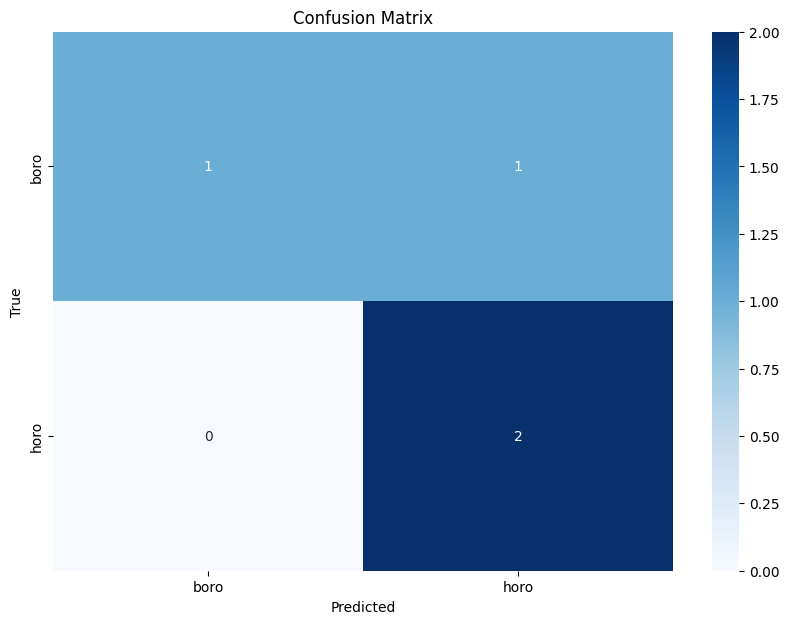

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to evaluate the model's performance
def evaluate_model(true_labels, predicted_labels, class_names):
    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=class_names)
    print("Confusion Matrix:\n", cm)
    
    # Classification Report
    print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example labels from your dataset
true_labels = ['boro', 'horo', 'boro', 'horo']  # Replace with the actual true labels from your dataset
predicted_labels = ['boro', 'horo', 'horo', 'horo']  # Replace with the predicted labels from your model

# Class names should match your actual dataset labels
class_names = ['boro', 'horo']  # Ensure this matches the actual unique classes in your dataset

# Call the evaluation function
evaluate_model(true_labels, predicted_labels, class_names)


In [31]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Resize to match the model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image_with_translation(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Predict the class label
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class
    class_names = ['boro', 'horo']  # Update this list with your class labels
    label_name = class_names[predicted_class]
    
    # Translate the predicted label
    translated = translate_label(label_name)
    
    # Print the prediction and translation
    print(f"Image: {image_path}")
    print(f"Predicted Label: {label_name}")
    if translated:
        print(f"Ol Chiki: {translated['Ol Chiki']}")
        print(f"Devanagari: {translated['Devanagari']}")
        print(f"English: {translated['English']}")
    else:
        print("Translation not found for the predicted label.")


In [32]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))  # Resize to match the model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image_with_translation(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    # Predict the class label
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class
    class_names = ['boro', 'horo']  # Update this list with your class labels
    label_name = class_names[predicted_class]
    
    # Translate the predicted label
    translated = translate_label(label_name)
    
    # Print the prediction and translation
    print(f"Image: {image_path}")
    print(f"Predicted Label: {label_name}")
    if translated:
        print(f"Ol Chiki: {translated['Ol Chiki']}")
        print(f"Devanagari: {translated['Devanagari']}")
        print(f"English: {translated['English']}")
    else:
        print("Translation not found for the predicted label.")


In [35]:
import numpy as np
import cv2

# Translation dictionary (based on your dictionary)
translations = {
    'boro': {
        'Ol Chiki': 'ᱵᱚᱲᱚ',
        'Devanagari': 'बोरो',
        'English': 'Fear'
    },
    'horo': {
        'Ol Chiki': 'ᱦᱚᱨᱟ',
        'Devanagari': 'होरा',
        'English': 'Way'
    },
    # Add more translations as needed
}

# Function to translate the predicted label
def translate_label(label):
    if label in translations:
        return translations[label]
    else:
        print(f"Translation for '{label}' not found.")
        return None

def preprocess_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None
    img = cv2.resize(img, (64, 64))  # Resize to match the model input
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def predict_image_with_translation(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    
    if img is None:
        return  # If image is not loaded properly, stop further processing

    # Predict the class label
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted class
    class_names = ['boro', 'horo']  # Update this list with your class labels

    if predicted_class >= len(class_names):
        print(f"Predicted class index {predicted_class} is out of range for class names.")
        return
    
    label_name = class_names[predicted_class]
    
    # Translate the predicted label
    translated = translate_label(label_name)
    
    # Print the prediction and translation
    print(f"Image: {image_path}")
    print(f"Predicted Label: {label_name}")
    if translated:
        print(f"Ol Chiki: {translated['Ol Chiki']}")
        print(f"Devanagari: {translated['Devanagari']}")
        print(f"English: {translated['English']}")
    else:
        print("Translation not found for the predicted label.")

# Example of testing an image
image_path = "C:\\Users\\prema\\OneDrive\\Documents\\Mundari Project\\mundari_dataset\\train\\boro_writer0_001.jpeg"
predict_image_with_translation(image_path)


Failed to load image: C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\boro_writer0_001.jpeg


In [37]:
import os
import cv2

# Example function to predict images from a directory
def predict_images_from_directory(directory_path):
    # List all files in the directory
    image_files = os.listdir(directory_path)

    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        
        # Check if the image exists
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue  # Skip to next image if the current image is not found

        # Load and preprocess the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Resize and normalize the image
        img = cv2.resize(img, (64, 64))  # Resize to match model input
        img = img / 255.0  # Normalize pixel values
        img = img.reshape(1, 64, 64, 1)  # Add channel dimension

        # Make a prediction using the model (ensure 'model' is defined)
        predictions = model.predict(img)
        predicted_class = predictions.argmax()  # Class with the highest probability
        confidence = predictions.max()  # Highest confidence

        # Print prediction results
        print(f"Image: {image_file} -> Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")

# Example usage
directory_path = "C:\\Users\\prema\\OneDrive\\Documents\\Mundari Project\\mundari_dataset\\train"
predict_images_from_directory(directory_path)


Failed to load image: C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\grayscale
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: img _3.jpeg -> Predicted Class: 2 (Confidence: 0.82)
Failed to load image: C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\labels.csv
Failed to load image: C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\nawa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: nawa_writer1_001.jpeg -> Predicted Class: 1 (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: nawa_writer1_002.jpeg -> Predicted Class: 1 (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: nawa_writer1_0023.jpeg -> Predicted Class: 2 (Confidence: 0.79)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: nawa_writer1_0024.jpeg -> Predicted Class: 2 (Confidence: 0.56)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: nawa_writer1_003.jpeg -> Predicted Class: 1 (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: nawa_wr

In [38]:
import os
import cv2

def predict_images_from_directory(directory_path):
    # List all files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        
        # Check if the image exists
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue  # Skip to next image if the current image is not found

        # Load and preprocess the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Resize and normalize the image
        img = cv2.resize(img, (64, 64))  # Resize to match model input
        img = img / 255.0  # Normalize pixel values
        img = img.reshape(1, 64, 64, 1)  # Add channel dimension

        # Make a prediction using the model (ensure 'model' is defined)
        predictions = model.predict(img)
        predicted_class = predictions.argmax()  # Class with the highest probability
        confidence = predictions.max()  # Highest confidence

        # Print prediction results
        print(f"Image: {image_file} -> Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")

# Example usage
directory_path = "C:\\Users\\prema\\OneDrive\\Documents\\Mundari Project\\mundari_dataset\\train"
predict_images_from_directory(directory_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: img _3.jpeg -> Predicted Class: 2 (Confidence: 0.82)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: nawa_writer1_001.jpeg -> Predicted Class: 1 (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: nawa_writer1_002.jpeg -> Predicted Class: 1 (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: nawa_writer1_0023.jpeg -> Predicted Class: 2 (Confidence: 0.79)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: nawa_writer1_0024.jpeg -> Predicted Class: 2 (Confidence: 0.56)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: nawa_writer1_003.jpeg -> Predicted Class: 1 (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: nawa_writer1_004.jpeg -> Predicted Class: 1 (Confidence: 0.51)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: nawa_writer1_005.jpeg -> Predicted Class: 1 (Confidence: 0.93)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: nawa_writer1_006.jpeg -> Predicted Class: 1 (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/ste

In [39]:
import os
import cv2
import numpy as np

# Define a dictionary to map the predicted class indices to their corresponding class labels
class_labels = {0: 'boro', 1: 'horo', 2: 'hora'}  # Adjust this based on your dataset

def predict_images_from_directory(directory_path):
    # List all image files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)
        
        # Check if the image exists
        if not os.path.exists(image_path):
            print(f"Image not found: {image_path}")
            continue  # Skip to next image if the current image is not found

        # Load and preprocess the image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Resize and normalize the image
        img = cv2.resize(img, (64, 64))  # Resize to match model input
        img = img / 255.0  # Normalize pixel values
        img = img.reshape(1, 64, 64, 1)  # Add channel dimension

        # Make a prediction using the model (ensure 'model' is defined)
        predictions = model.predict(img)
        predicted_class_index = predictions.argmax()  # Class with the highest probability
        confidence = predictions.max()  # Highest confidence

        # Map the predicted class index to the class label
        predicted_class = class_labels.get(predicted_class_index, "Unknown")

        # Print prediction results
        print(f"Image: {image_file} -> Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")

# Example usage
directory_path = "C:\\Users\\prema\\OneDrive\\Documents\\Mundari Project\\mundari_dataset\\train"
predict_images_from_directory(directory_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: img _3.jpeg -> Predicted Class: hora (Confidence: 0.82)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: nawa_writer1_001.jpeg -> Predicted Class: horo (Confidence: 1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Image: nawa_writer1_002.jpeg -> Predicted Class: horo (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: nawa_writer1_0023.jpeg -> Predicted Class: hora (Confidence: 0.79)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image: nawa_writer1_0024.jpeg -> Predicted Class: hora (Confidence: 0.56)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: nawa_writer1_003.jpeg -> Predicted Class: horo (Confidence: 0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: nawa_writer1_004.jpeg -> Predicted Class: horo (Confidence: 0.51)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: nawa_writer1_005.jpeg -> Predicted Class: horo (Confidence: 0.93)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: nawa_writer1_006.jpeg -> Predicted Class: horo (Confidence: 0.99)
1/1 ━━━━━

In [41]:
import cv2
import numpy as np

# Add translations for the labels
translations = {
    "boro": {
        "Ol Chiki": "ᱵᱚᱲᱚ",
        "Devanagari": "बोरो",
        "English": "Fear"
    },
    "hora": {
        "Ol Chiki": "ᱦᱚᱨᱟ",
        "Devanagari": "होरा",
        "English": "Way"
    },
    # Add more translations as needed
}

# Modify the predict_image function to include translation
def predict_image_with_translation(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    img = cv2.resize(img, (64, 64))  # resize to match model input
    img = img / 255.0  # normalize pixel values
    img = np.expand_dims(img, axis=-1)  # add channel dimension
    img = np.expand_dims(img, axis=0)  # add batch dimension

    # Make prediction
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    print(f"Predicted Class Index: {predicted_class} (Confidence: {confidence:.2f})")

    # Map predicted class index to label
    class_labels = {0: "boro", 1: "hora"}  # Define your class labels here
    predicted_label = class_labels.get(predicted_class, "Unknown")

    print(f"Predicted Label: {predicted_label} (Confidence: {confidence:.2f})")

    # Output translations
    if predicted_label in translations:
        translation = translations[predicted_label]
        print(f"Translation for '{predicted_label}':")
        print(f"  ➔ Ol Chiki: {translation['Ol Chiki']}")
        print(f"  ➔ Devanagari: {translation['Devanagari']}")
        print(f"  ➔ English: {translation['English']}")
    else:
        print(f"No translations available for '{predicted_label}'.")

# Example usage with an image
image_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train\unknown_writer0_132.jpeg"
predict_image_with_translation(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Class Index: 2 (Confidence: 0.66)
Predicted Label: Unknown (Confidence: 0.66)
No translations available for 'Unknown'.


In [45]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd

# Load the model (Ensure the model path is correct)
model = tf.keras.models.load_model('trained_mundari_model.keras')

# Define class labels based on your dataset
class_labels = {0: "boro", 1: "hora", 2: "Unknown"}  # You can add more classes if needed

# Load the dictionary (translation) file
# Replace with the correct path to your CSV file
dictionary_path = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dictionary (1).csv"
dictionary_df = pd.read_csv(dictionary_path)

# Define a function to load and preprocess images
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (64, 64))  # Resize to match input shape of model
        image = np.expand_dims(image, axis=-1)  # Add channel dimension if grayscale
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        image = image / 255.0  # Normalize image
        return image
    except Exception as e:
        print(f"Failed to load image: {image_path}, Error: {e}")
        return None

# Function to predict and translate the image
def predict_and_translate(image_path):
    image = preprocess_image(image_path)
    if image is not None:
        predictions = model.predict(image)
        predicted_class_index = np.argmax(predictions)
        predicted_class_label = class_labels.get(predicted_class_index, "Unknown")
        confidence = predictions[0][predicted_class_index]

        print(f"Image: {image_path} -> Predicted Class: {predicted_class_label} (Confidence: {confidence:.2f})")

        # Check if the predicted label exists in the dictionary for translation
        if predicted_class_label != "Unknown":
            translation = dictionary_df[dictionary_df['Ol Chiki'] == predicted_class_label]
            if not translation.empty:
                ol_chiki = translation['Ol Chiki'].values[0]
                devanagari = translation['Devanagari'].values[0]
                english = translation['English Meaning'].values[0]
                print(f"Translation for '{predicted_class_label}':")
                print(f"  ➔ Ol Chiki: {ol_chiki}")
                print(f"  ➔ Devanagari: {devanagari}")
                print(f"  ➔ English: {english}")
            else:
                print(f"No translations available for '{predicted_class_label}'.")
        else:
            print(f"No translations available for 'Unknown'.")
    else:
        print(f"Image not found or could not be loaded: {image_path}")

# Example usage: Loop through all images in the dataset folder
image_folder_path = 'C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train'
for image_name in os.listdir(image_folder_path):
    if image_name.endswith(".jpeg"):  # Or any other image extension
        image_path = os.path.join(image_folder_path, image_name)
        predict_and_translate(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train\img _3.jpeg -> Predicted Class: Unknown (Confidence: 0.82)
No translations available for 'Unknown'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train\nawa_writer1_001.jpeg -> Predicted Class: hora (Confidence: 1.00)
No translations available for 'hora'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train\nawa_writer1_002.jpeg -> Predicted Class: hora (Confidence: 0.99)
No translations available for 'hora'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Image: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train\nawa_writer1_0023.jpeg -> Predicted Class: Unknown (Confidence: 0.79)
No translations available for 'Unknown'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/tr

In [48]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,249,928 (12.40 MB)

 Trainable params: 1,624,963 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,624,965 (6.20 MB)

In [54]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to check if an image exists
def check_image_exists(image_path):
    if os.path.exists(image_path):
        return True
    else:
        print(f"Image not found: {image_path}")
        return False

# Function to load image and process it
def load_image(image_path, img_size=(64, 64)):
    if check_image_exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, img_size)  # Resize the image
        img = img / 255.0  # Normalize image
        return img
    return None

# Load dataset and labels
def load_dataset(dataset_path):
    images = []
    labels = []
    
    # Go through the directory and load images
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for img_name in os.listdir(label_path):
                img_path = os.path.join(label_path, img_name)
                img = load_image(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

# Train the model
def train_model(images, labels, img_size=(64, 64)):
    # Encode the labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Add extra dimension for channel (as grayscale image)
    X_train = X_train.reshape(X_train.shape[0], img_size[0], img_size[1], 1)
    X_test = X_test.reshape(X_test.shape[0], img_size[0], img_size[1], 1)
    
    # Create CNN model
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(len(np.unique(labels)), activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    
    # Save the model
    model.save('mundari_handwritten_model.h5')
    
    return model, label_encoder

# Translate image prediction into Ol Chiki, Devanagari, English
def translate_label(label, label_encoder):
    translations = {
        'boro': ['ᱵᱚᱲᱚ', 'बोरो', 'Fear'],
        'horo': ['ᱦᱚᱨᱟ', 'होरा', 'Way'],
        # Add more translations here as needed
    }
    
    label_name = label_encoder.inverse_transform([label])[0]
    if label_name in translations:
        ol_chiki, devanagari, english = translations[label_name]
        print(f"Translation for '{label_name}':")
        print(f"  ➔ Ol Chiki: {ol_chiki}")
        print(f"  ➔ Devanagari: {devanagari}")
        print(f"  ➔ English Meaning: {english}")
    else:
        print(f"No translations available for '{label_name}'.")

# Predict the label of an image
def predict_image(image_path, model, label_encoder, img_size=(64, 64)):
    img = load_image(image_path, img_size)
    if img is not None:
        img = img.reshape(1, img_size[0], img_size[1], 1)
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_confidence = np.max(prediction)
        
        print(f"Predicted Label: {label_encoder.inverse_transform([predicted_class])[0]} (Confidence: {predicted_confidence:.2f})")
        translate_label(predicted_class, label_encoder)

# Main workflow
dataset_path = 'C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train'  # Change to your dataset path
images, labels = load_dataset(dataset_path)
model, label_encoder = train_model(images, labels)

# Test with an image
test_image_path = 'C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/test/unknown_writer0_134.jpeg'  # Provide the correct test image path
predict_image(test_image_path, model, label_encoder)


Epoch 1/10


C:\Users\prema\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5209 - loss: 0.6914 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9672 - loss: 0.2251 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9765 - loss: 0.1874 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9880 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.0260
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9745 - loss: 0.1452 - val_accuracy: 1.0000 - val_loss: 0.0765
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9651 - loss: 0.1876 - val_accuracy: 1.0000 - val_loss: 0.0360
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9620 - loss: 0.1935 - val_accuracy: 1.0000 - val_loss: 0.0129
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9713 - loss: 0.1601 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 9/10

Image not found: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/test/unknown_writer0_134.jpeg


In [55]:
model.save('my_model.keras')  # Save model in the newer Keras format


In [56]:
image_path = "C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/test/unknown_writer0_134.jpeg"
print("Loading image from:", image_path)


Loading image from: C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/test/unknown_writer0_134.jpeg


In [2]:
import tensorflow as tf

img_height, img_width = 64, 64
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/prema/OneDrive/Documents/Mundari Project/mundari_dataset/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 152 files belonging to 3 classes.
Found 11 files belonging to 3 classes.


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5189 - loss: 5.8909 - val_accuracy: 1.0000 - val_loss: 5.6320
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9620 - loss: 5.4194 - val_accuracy: 1.0000 - val_loss: 4.1694
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9849 - loss: 3.5492 - val_accuracy: 1.0000 - val_loss: 0.7414
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9734 - loss: 0.5582 - val_accuracy: 1.0000 - val_loss: 9.3628e-04
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9849 - loss: 0.2052 - val_accuracy: 1.0000 - val_loss: 1.7151e-06
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9828 - loss: 0.2880 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9734 - loss: 0.5005 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9797 - loss: 0.3339 - val_accuracy: 1.0000 - 

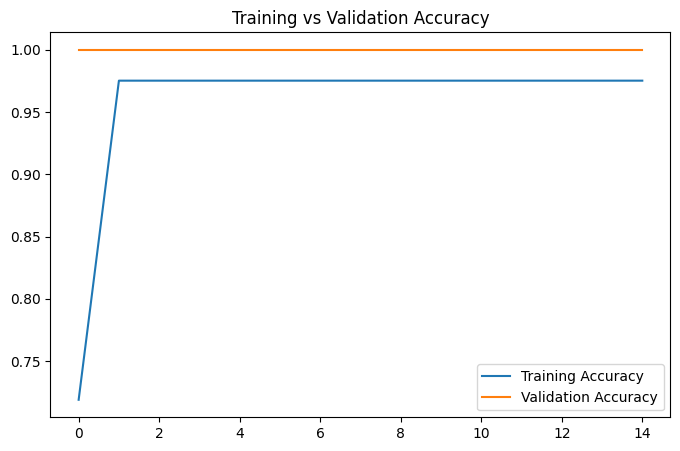

Training finished successfully!


In [4]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

# Set paths
dataset_dir = r"C:\Users\prema\OneDrive\Documents\Mundari Project\mundari_dataset\train"  # Change if needed
img_height, img_width = 64, 64
batch_size = 32

# Load images and labels
images = []
labels = []
class_names = sorted(os.listdir(dataset_dir))  # Folders are class names

for label_index, class_folder in enumerate(class_names):
    class_folder_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for file_name in os.listdir(class_folder_path):
            file_path = os.path.join(class_folder_path, file_name)
            if file_name.endswith(('.jpeg', '.jpg', '.png')):
                img = cv2.imread(file_path)
                if img is None:
                    print(f"Failed to load image: {file_path}")
                    continue
                img = cv2.resize(img, (img_width, img_height))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                images.append(img)
                labels.append(label_index)

images = np.array(images)
labels = np.array(labels)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_val = X_val / 255.0

# Define model
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=15,
                    batch_size=batch_size)

# Save the model
model.save('mundari_handwritten_model.keras')  # ✅saves in Keras format, not old H5

# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

print("Training finished successfully!")
